# Temporary Discretization
<p>This notebook will explore the use of temporarily discretizing an array to simulate a higher resolution of flow. If it works, this method would save a lot of memory.</p>

## Taylor Series
<p>The crux of this method hinges on describing the shape of the heads between 2 values as a Taylor Series. For now, it will be a 1D series, but it could easily be expanded to have more terms and become nonlinear.</p>
<p>Linear regression formula:</p>
<h3><center>$A = \frac{X^{T}y}{(X^{T}X)^{-1}}$</center></h3>
<p>Where $A$ is a vector of multipliers. For the linear example, it will contain m and b from y = mx + b</p>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def linearize(xs,ys):
    '''
    Returns an array with 2 elements: m and b.
    '''
    X = np.array([xs,np.ones(xs.size)]).T
    return np.linalg.inv((X.T@X))@X.T@ys

def quadrizeMultipliers(xs,ys):
    X = np.array([xs**2,xs,np.ones(xs.size)]).T
    return np.linalg.inv((X.T@X))@X.T@ys

def quadrize(xs,ys):
    X = np.array([xs**2,xs,np.ones(xs.size)]).T
    m = np.linalg.inv((X.T@X))@X.T@ys
    return m[0]*xs**2 + m[1]*xs + m[2]

def cubize(xs,ys):
    X = np.array([xs**3,xs**2,xs,np.ones(xs.size)]).T
    m = np.linalg.inv((X.T@X))@X.T@ys
    return m[0]*xs**3 + m[1]*xs**2 + m[2]*xs + m[3]

def taylor(xs,ys,degree = 1):
    X = np.array([xs**deg for deg in range(degree + 1)])
    print('X shape: {}'.format(X.shape))
    m = np.linalg.inv((X.T@X))@X.T@ys
    new = np.zeros(xs.size)
    for i in range(degree + 1):
        new += m[i]*x[i]**i
    return new

## Code Analysis
<p>Here, we have two functions. <b>linearize</b> is just simple linear regression, while <b>quadrize</b> is a quadratic fit. It's not really all that much more complicated. The code below isn't anything special, just to make sure that everything works as intended.</p>

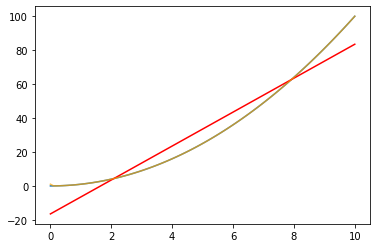

In [37]:
%matplotlib inline
x = np.linspace(0,10,100)
y = x**2

[m,b] = linearize(x,y)

[m2,m1,m0] = quadrizeMultipliers(x,y)

yLin = m*x + b

yQuad = m2*x**2 + m1**x + m0

plt.plot(x,y)
plt.plot(x,yLin, color = 'red')
plt.plot(x,yQuad,'orange', alpha = .7)
plt.show()

## Now, to apply it to a model

In [2]:
def flow1D(heads):
    queue = np.zeros(heads.shape)
    queue[1: ] += (heads[:-1] - heads[1: ])*.1
    queue[:-1] += (heads[1: ] - heads[:-1])*.1
    
    heads += queue
    del queue


In [27]:
length = 101
heads = np.zeros(length)
lengths = np.linspace(0,10,length)
iters = 5000

for i in range(iters):
    heads[0]  = 1
    heads[-1] = 0
    flow1D(heads)

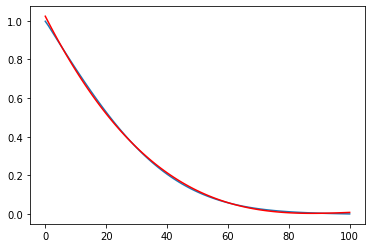

In [28]:
yQuad = quadrize(lengths,heads)
yCube = cubize(lengths,heads)

plt.plot(heads)
#plt.plot(yQuad, color = 'orange')
plt.plot(yCube, color = 'red')
plt.show()

## Model Analysis
<p>This seems to work pretty well. Given that the head value does not look like a right angle (such as when the model is evolving towards steady state), there seems to be some good agreement between the actual array and the calculated one. Using the cubic function gives even a closer model, especially at the end. It seems that I could just keep adding terms to get greater accuracy, but that's just more and more time spend.</p>
<p>After spending some time checking the time for each element, I think I could add some more values if necessary because I think that it doesn't take too much time.</p>
<p>Now, I want to split this up into a couple arrays. I'll split this up into 10 arrays that each represent 10 elements.</p>

In [29]:
sample = np.copy(heads[::10])
sampleLengths = np.copy(lengths[::10])

# Now to get the multipliers for each of the boxes
mult = []
mult.append(quadrize(lengths[0:11],heads[0:11]))

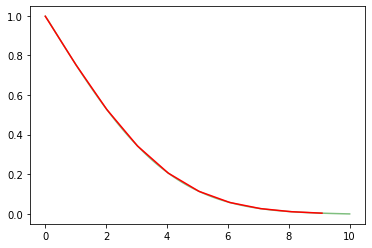

In [18]:
%matplotlib inline
plt.plot(lengths, heads, color = 'green', alpha = .5)
plt.plot(sampleLengths, sample, color = 'red')
plt.show()